## AUSTRALIAN CREDIT APPROVAL

In this project we will analyze a well-known case study in finance industry - credit card approval. Based on available features, we will predict if an applicant can get a card approval (1) or not (0). This study is a classic **Supervised Learning** problem (**Classification**). To conduct our analysis, we will use Logistic Regression model and later compare its performance with Ensemble methods (Random Forest) and XBoost Classifier. 


Data from UCI Repository: https://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval
Quinlan, R. (1987). Statlog (Australian Credit Approval) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C59012.

In [ ]:
# Import libraries

# data wrangling
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import StandardScaler
# model selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# model evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Import data and change column names
url = "https://raw.githubusercontent.com/wildanalaziz/AustralianCredit/refs/heads/master/australian.csv"

cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11','X12', 'X13', 'X14', 'Y']

data = pd.read_csv(url)
data.columns = cols

data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


### Explanatory Data Analysis

Our dataset contain multiple continous and categorical features, which were annonimized to remain confidelity. Categorical features have been already mapped to numerical ones.

In [10]:
data.shape

(690, 15)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      690 non-null    int64  
 1   X2      690 non-null    float64
 2   X3      690 non-null    float64
 3   X4      690 non-null    int64  
 4   X5      690 non-null    int64  
 5   X6      690 non-null    int64  
 6   X7      690 non-null    float64
 7   X8      690 non-null    int64  
 8   X9      690 non-null    int64  
 9   X10     690 non-null    int64  
 10  X11     690 non-null    int64  
 11  X12     690 non-null    int64  
 12  X13     690 non-null    int64  
 13  X14     690 non-null    int64  
 14  Y       690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [ ]:
# Print summary statistics
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


From above table we can see that we have wide ranges of values in features. Data normalization will be helphul with that problem.

In [ ]:
# Handle missing data
data.isnull().sum()/len(data)

X1     0.0
X2     0.0
X3     0.0
X4     0.0
X5     0.0
X6     0.0
X7     0.0
X8     0.0
X9     0.0
X10    0.0
X11    0.0
X12    0.0
X13    0.0
X14    0.0
Y      0.0
dtype: float64

In [ ]:
data['Y'].value_counts() # there is no need to use SMOTE

Y
0    383
1    307
Name: count, dtype: int64

<AxesSubplot:xlabel='Y'>

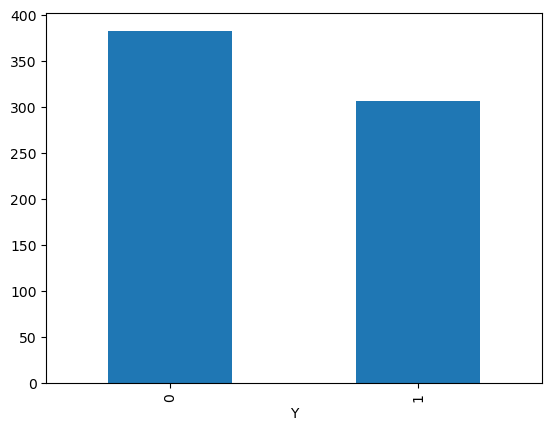

In [26]:
data['Y'].value_counts().plot(kind='bar')

### Data pre-processing

#### Check data distribution and detect outliers

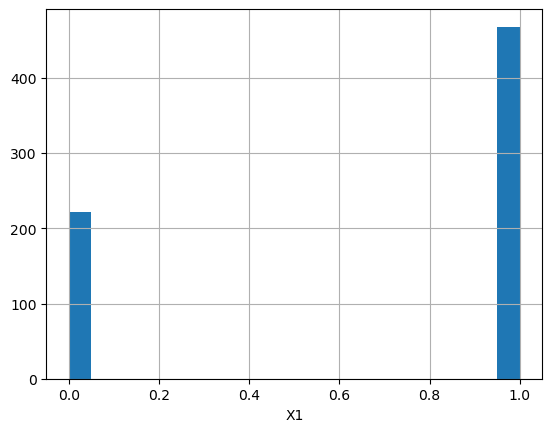

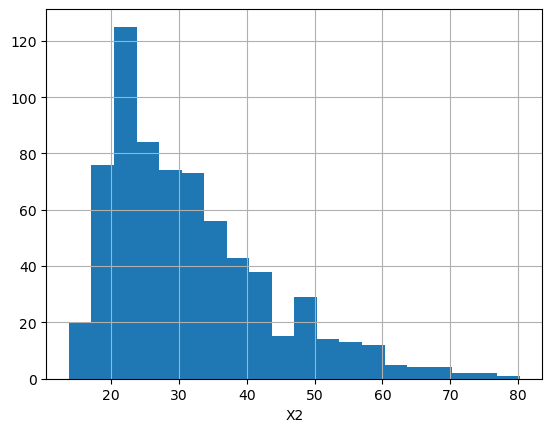

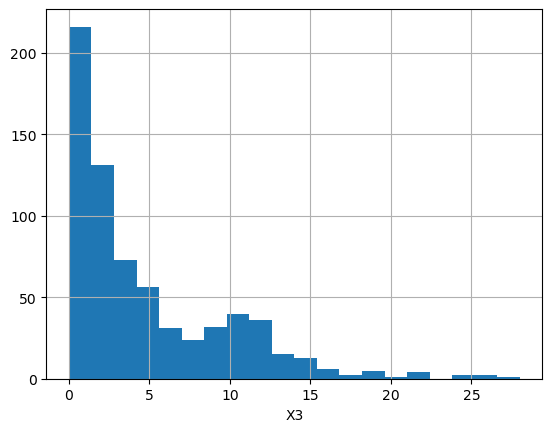

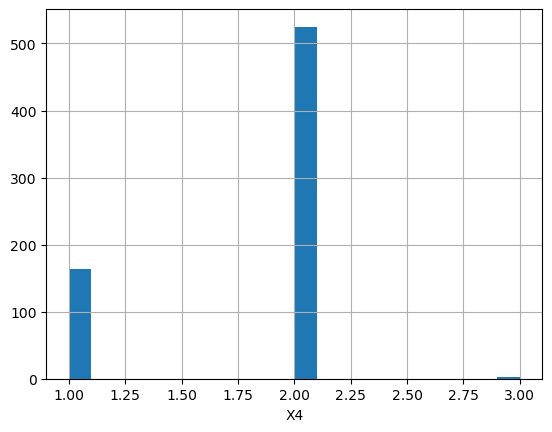

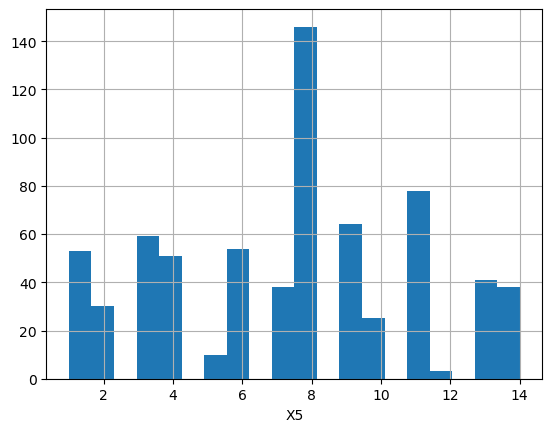

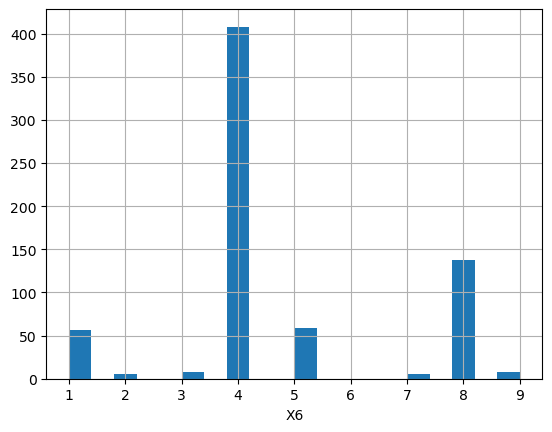

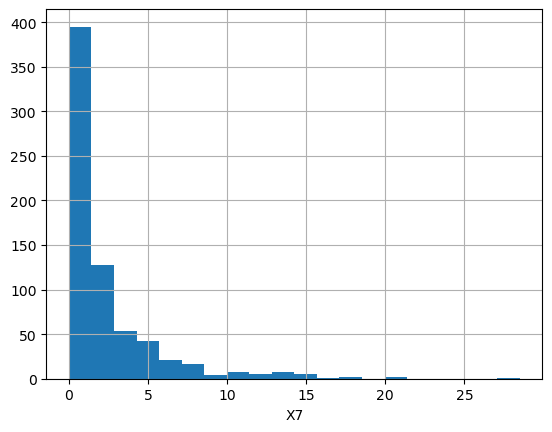

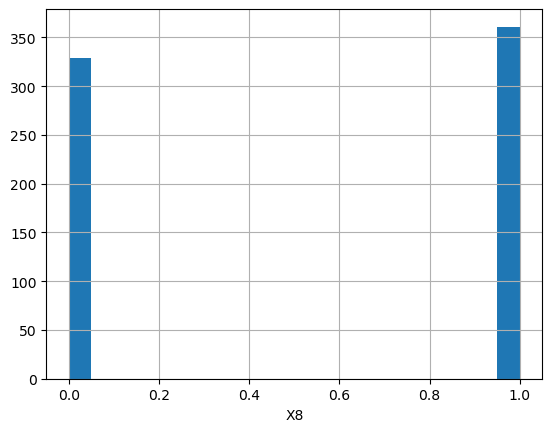

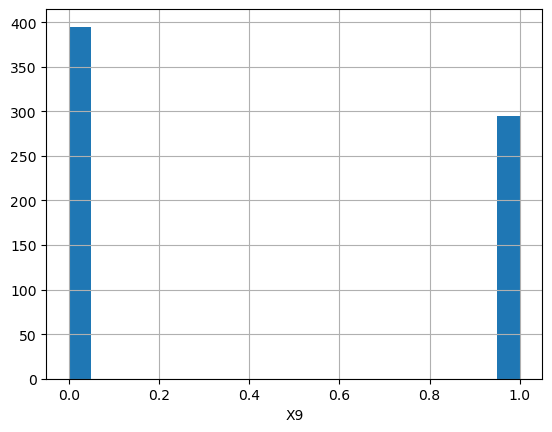

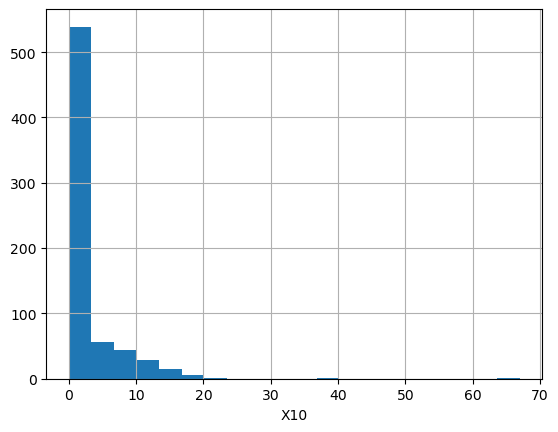

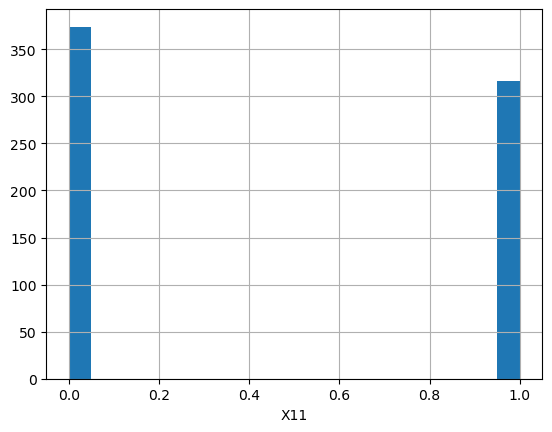

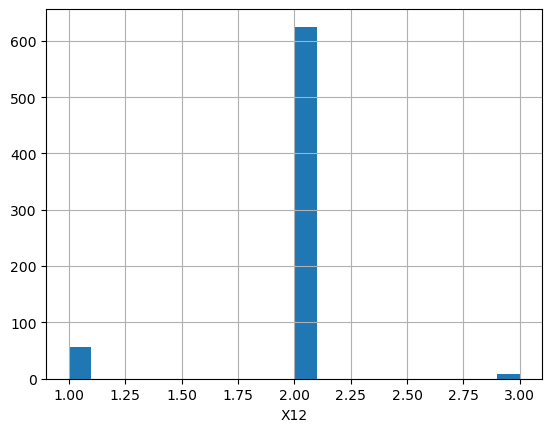

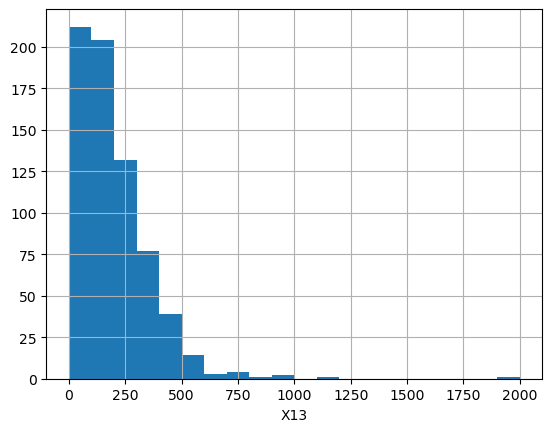

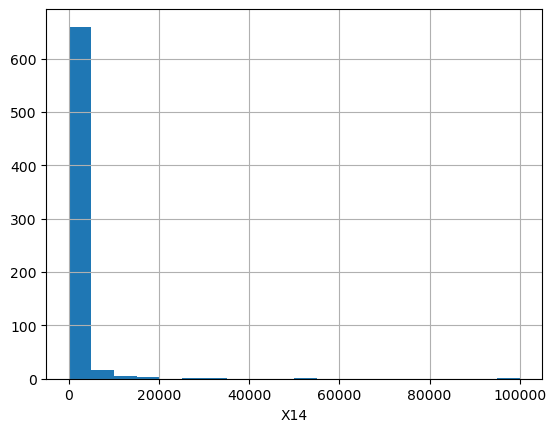

In [24]:
for feature in data.columns[:14]:

    fig = data[feature].hist(bins=20)
    fig.set_xlabel(feature)
    plt.show()


Based on the above graphs, we can conclude that data transformation will be helpful here.

### Create feature and target variables

In [ ]:
# features
X = data.drop('Y', axis=1)
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12


In [40]:
# target
y = data['Y']
y

0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1
Name: Y, Length: 690, dtype: int64

#### Data standarization

Data standarization is always a good preactise 

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.68873723, -0.80105183,  1.34711063, ...,  0.23782765,
        -0.48835847,  0.03738039],
       [-1.45193254, -0.75124044,  0.45054795, ...,  0.23782765,
        -0.13959116, -0.19541334],
       [-1.45193254, -0.16785619, -0.60482292, ...,  0.23782765,
         0.55794344, -0.19541334],
       ...,
       [-1.45193254, -1.07543661,  0.96114643, ...,  0.23782765,
        -0.48835847, -0.19541334],
       [-1.45193254, -0.35021653,  1.95822062, ...,  0.23782765,
        -0.3721027 , -0.19330052],
       [ 0.68873723,  0.79628971, -0.94857229, ..., -3.11117398,
         2.18552419, -0.19541334]])

### Split the data into train and test sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [46]:
X_train

array([[ 6.88737232e-01,  8.10642148e-01, -1.44480200e-01, ...,
         2.37827652e-01,  7.90454978e-01, -1.95413339e-01],
       [-1.45193254e+00, -2.52282275e-01, -2.02776876e-01, ...,
         2.37827652e-01, -8.37125771e-01, -1.65833938e-01],
       [ 6.88737232e-01,  1.51722241e-04, -1.52521120e-01, ...,
         2.37827652e-01,  6.16071326e-01,  2.42323386e-01],
       ...,
       [-1.45193254e+00, -1.04673174e+00,  1.31926457e-01, ...,
         2.37827652e-01, -6.04614236e-01, -1.02449506e-01],
       [ 6.88737232e-01, -1.30760835e+00, -8.05845946e-01, ...,
         2.37827652e-01,  9.76464206e-01, -6.28822552e-02],
       [ 6.88737232e-01, -3.29110013e-01,  1.80745336e+00, ...,
         2.37827652e-01,  1.76119064e+00, -9.93763218e-02]])

In [47]:
X_test

array([[ 0.68873723,  2.85797473,  1.25464004, ...,  0.23782765,
        -0.94175596, -0.19541334],
       [ 0.68873723, -1.13115783,  1.10387277, ...,  0.23782765,
         0.79045498, -0.19291638],
       [ 0.68873723,  1.42948536, -0.10226536, ...,  0.23782765,
         0.23824008, -0.19541334],
       ...,
       [ 0.68873723,  0.83174867,  0.0485019 , ...,  0.23782765,
         1.66237324, -0.19541334],
       [-1.45193254, -0.4912081 , -0.8561017 , ...,  0.23782765,
         1.78444179, -0.19541334],
       [ 0.68873723,  1.35941171, -0.89831654, ...,  0.23782765,
        -1.06963731,  2.68569718]])

In [48]:
y_train

178    1
265    0
352    1
529    0
409    0
      ..
71     0
106    1
270    0
435    1
102    1
Name: Y, Length: 483, dtype: int64

In [49]:
y_test

286    1
511    0
257    1
336    1
318    0
      ..
601    1
66     0
11     1
674    1
559    1
Name: Y, Length: 207, dtype: int64

### Training the Logistic Regression model

In [51]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

### Make predictions

Predict if an applicant will get credit approval or not, based on the test set.

In [57]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

### Model evaluation

We will evaluate model's performance based on the standard metrics.

`Classification report` evaluate model performance. It displays the:
- precision

- recall

- f1 score

- support

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       126
           1       0.81      0.81      0.81        81

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207



#### Confusion matrix

We would like to know the underlying distribution of values and the type of errors our classifier is making. One such metric to analyze the model performance is `confusion matrix` (type error I = FP, type error II = FN).

<AxesSubplot:>

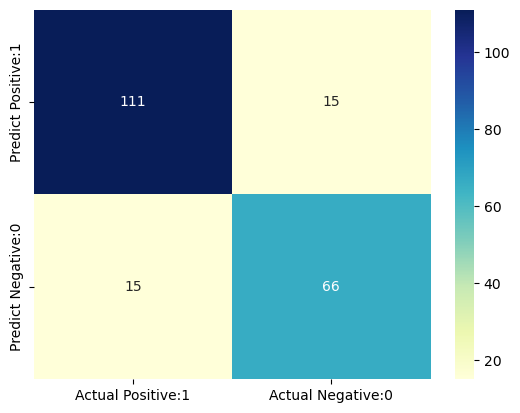

In [68]:
cm = confusion_matrix(y_test,y_pred)
cm_matrix = pd.DataFrame(data=cm, columns = ['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d',cmap='YlGnBu')

#### ROC-AUC

`ROC-AUC` is a plot which shows the performance of a classification model at various treshold levels.
It plots **True Positive Rate** **TPR** against the **False Positive Rate** **FPR** at various treshold levels.

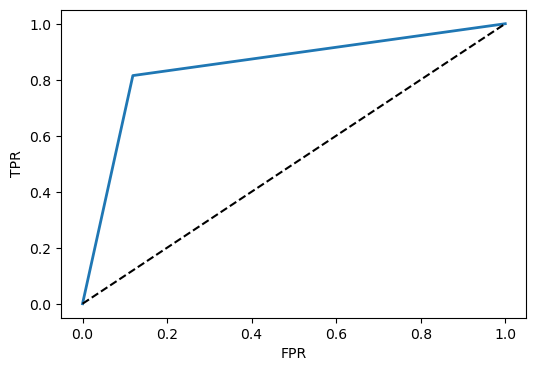

In [69]:
from sklearn.metrics import roc_curve

fpr, tpr, treshold = roc_curve(y_test,y_pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [71]:
roc_auc = roc_auc_score(y_test,y_pred)

print(round(roc_auc,2))

0.85


ROC-AUC score equals 0.85 and from the above metrics, we can conclude that our model performs well. 

We can now extend our analysis and compare model evaluation using **Random Forest** or **XGBoost Classifier** and/or to use `GridSearchCV` to find hyperparameters which improve model's performance.